In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [271]:
table_10

стохастический   пакетный  мини-пакетный
время           0.005109   0.000168       0.004960
ошибка          0.011821   0.023130       0.004163
итерации       90.000000  30.000000      60.000000

In [272]:
table_100

стохастический   пакетный  мини-пакетный
время           0.051041   0.000179       0.018247
ошибка          0.002726   0.003052       0.005307
итерации       90.000000  30.000000      60.000000

In [273]:
table_1000

стохастический   пакетный  мини-пакетный
время           0.511226   0.000267       0.155891
ошибка          0.001474   0.001759       0.001795
итерации       90.000000  30.000000      60.000000

In [225]:
# функция для создания списка, содержащего мини-пакеты
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
        
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# функция для выполнения мини-пакетного градиентного спуска
def mini_batch_grad(x, y, learning_rate = 0.1, batch_size = 32, max_iters = 50):
    theta = np.random.randn(2,1)
    for itr in range(max_iters):
        mini_batches = create_mini_batches(x, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            X_mini = np.c_[np.ones((X_mini.shape)),X_mini]
            theta = theta - learning_rate * grad(X_mini, y_mini, theta)
    return theta


# функция для выполнения стохастического градиентного спуска
def stochastic_grad(x, y, learning_rate = 0.1, max_iters = 1000):
    theta = np.random.randn(2,1)
    x_b = np.c_[np.ones((x.shape)),x]
    for itr in range(max_iters):
        for i in range(x.shape[0]):
            theta = theta - learning_rate * grad(x_b[i].reshape(1,2), y[i].reshape(1,1), theta)
    return theta

# функция для выполнения пакетного градиентного спуска
def batch_grad(x, y, learning_rate = 0.1, max_iters = 1000):
    x_b = np.c_[np.ones((x.shape)),x]
    theta = np.random.randn(2,1)
    for itr in range(max_iters):
      theta = theta - learning_rate * grad(x_b, y, theta)
    return theta

# функция для вычислениея градиента
def grad(x_b, y, theta):
  return 2/x.shape[0]*x_b.T.dot(x_b.dot(theta)-y) 

# решение методом нормального уравнния
def norm_urav(x,y):
  x_b=np.c_[np.ones((x.shape[0],1)),x]
  theta = np.dot (np.linalg.inv (np.dot (x_b.T,x_b)),np.dot(x_b.T,y))
  x1=np.array([[x.min()], [x.max()]])
  x1_b=np.c_[np.ones((2,1)),x1]
  y_pred=x1_b.dot(theta)
  return x1,y_pred

# функция для генерации данных
def generate_cloud(n,param):
  x = param[2]*np.random.normal(0, 0.1,n).reshape(n,1)
  y = param[0] + param[1] * x + np.random.normal(0, 0.1,n).reshape(n,1)
  return x,y

# Тест на 10 точек

In [263]:
param=[2,4,3]
x,y=generate_cloud(10,param)#генерируем 10 точек

0.00015387296676635742


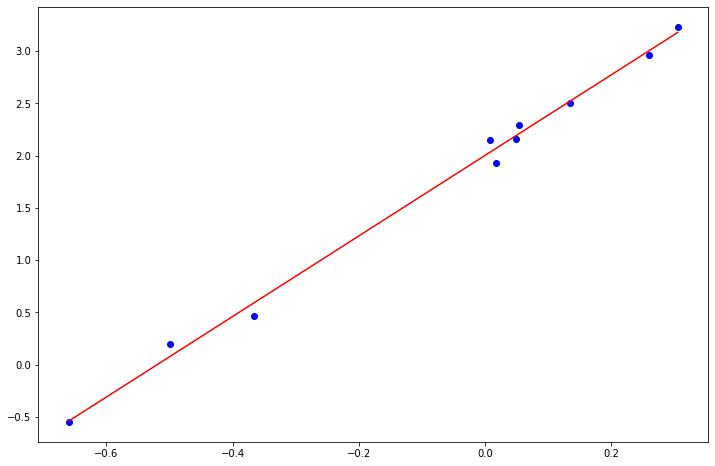

In [264]:
# нормальное уравнение
n=1000
t=np.zeros(n)
for i in range(n):
  start_time = time.time()
  x1,y1=norm_urav(x,y)
  t[i]=time.time() - start_time
print(t.mean())

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.010033607482910156
гармоническая ошибка по theta:  0.018151830224712777


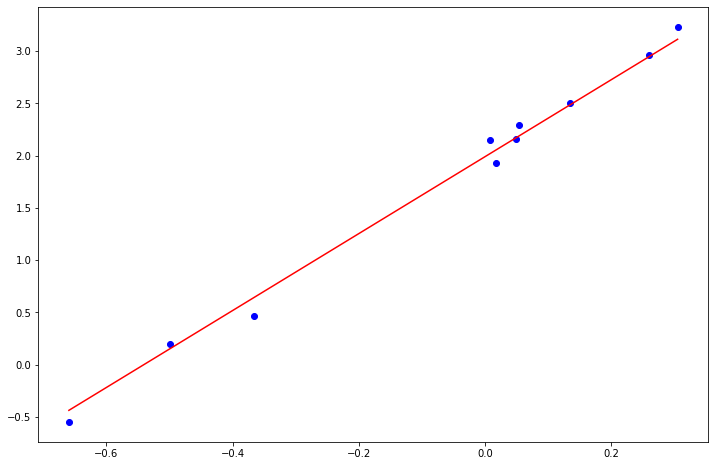

In [265]:
# стохастический градиентный  спуск

start_time = time.time()
theta = stochastic_grad(x, y,learning_rate = 0.2, max_iters=90)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.0005366802215576172
гармоническая ошибка по theta:  0.024349121432270276


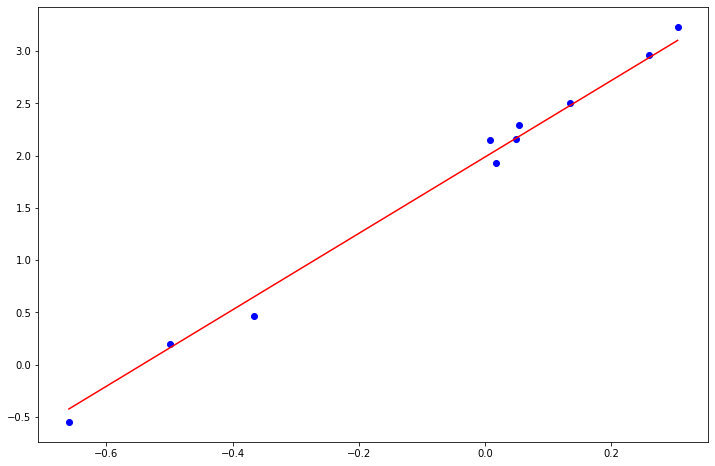

In [266]:
# пакетный градиентный спуск

start_time = time.time()
theta = batch_grad(x, y,learning_rate = 0.5, max_iters=30)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.00978851318359375
гармоническая ошибка по theta:  0.0043825502181951154


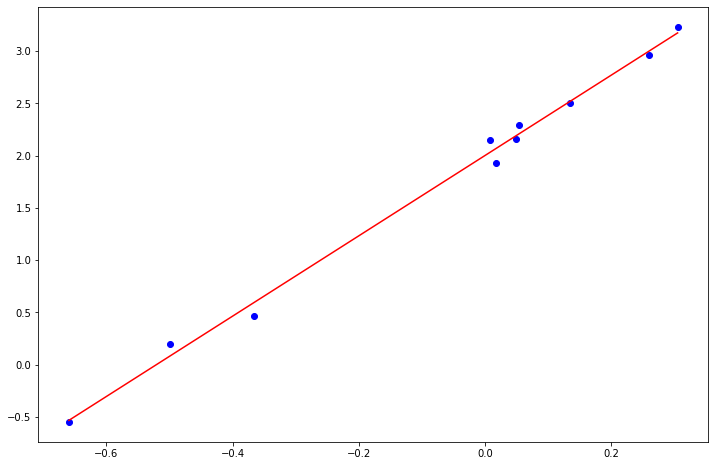

In [267]:
# минипакетный градиентный спуск

start_time = time.time()
theta = mini_batch_grad(x, y, learning_rate = 0.25,batch_size=20, max_iters=60)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график
  

In [268]:
n=100
table_t=np.zeros(3)
table_err=np.zeros(3)
table_iters=np.zeros(3)

# стохастический градиентный  спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[0]=90
  theta = stochastic_grad(x, y,learning_rate = 0.2, max_iters=int(table_iters[0]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[0]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[0]=2 / ( (1/err1) + (1/err2) )

# пакетный градиентный спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[1]=30
  theta = batch_grad(x, y,learning_rate = 0.5, max_iters=int(table_iters[1]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[1]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[1]=2 / ( (1/err1) + (1/err2) )

# мини-пакетный градиентный спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[2]=60
  theta = mini_batch_grad(x, y, learning_rate = 0.25,batch_size=20, max_iters=int(table_iters[2]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[2]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[2]=2 / ( (1/err1) + (1/err2) )

table_10=pd.DataFrame(np.array([table_t, table_err, table_iters]), columns=['стохастический','пакетный','мини-пакетный'], index=['время', 'ошибка', 'итерации'])
table_10

стохастический   пакетный  мини-пакетный
время           0.005109   0.000168       0.004960
ошибка          0.011821   0.023130       0.004163
итерации       90.000000  30.000000      60.000000

# Тест на 100 точек

In [269]:
param=[2,4,3]
x,y=generate_cloud(100,param)#генерируем 100 точек

0.00014986133575439452


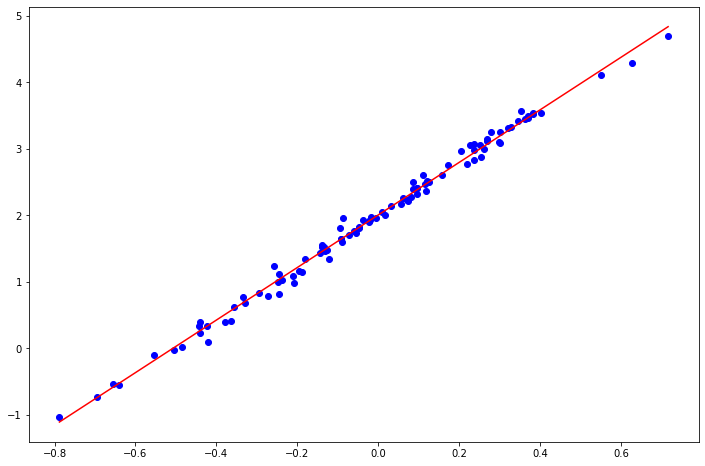

In [141]:
# нормальное уравнение
n=1000
t=np.zeros(n)
for i in range(n):
  start_time = time.time()
  x1,y1=norm_urav(x,y)
  t[i]=time.time() - start_time
print(t.mean())

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.06099891662597656
гармоническая ошибка по theta:  0.012561486643283187


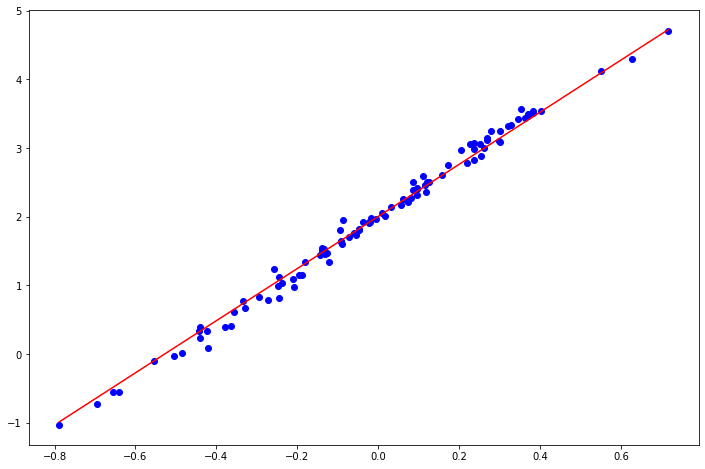

In [199]:
# стохастический градиентный  спуск

start_time = time.time()
theta = stochastic_grad(x, y,learning_rate = 0.2, max_iters=90)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.001367807388305664
гармоническая ошибка по theta:  0.005587372003211503


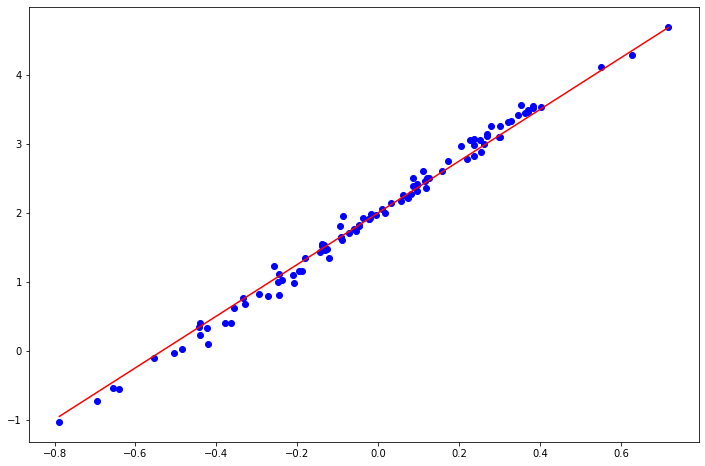

In [203]:
# пакетный градиентный спуск

start_time = time.time()
theta = batch_grad(x, y,learning_rate = 0.5, max_iters=30)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.02213287353515625
гармоническая ошибка по theta:  0.0025422355179170034


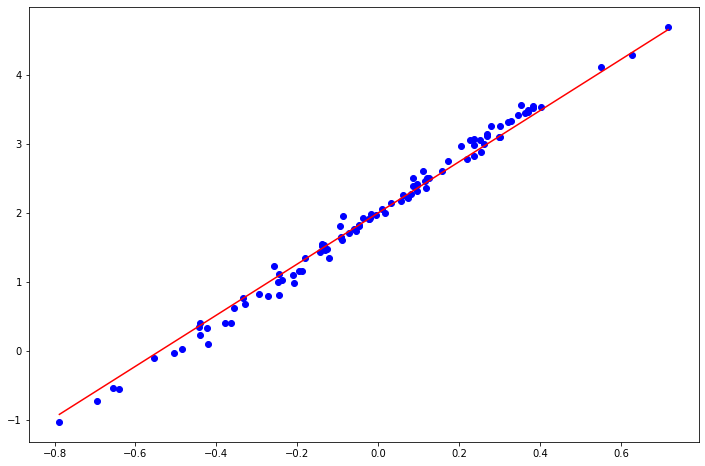

In [205]:
# минипакетный градиентный спуск

start_time = time.time()
theta = mini_batch_grad(x, y, learning_rate = 0.25,batch_size=20, max_iters=60)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график
  

In [270]:
n=100
table_t=np.zeros(3)
table_err=np.zeros(3)
table_iters=np.zeros(3)

# стохастический градиентный  спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[0]=90
  theta = stochastic_grad(x, y,learning_rate = 0.2, max_iters=int(table_iters[0]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[0]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[0]=2 / ( (1/err1) + (1/err2) )

# пакетный градиентный спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[1]=30
  theta = batch_grad(x, y,learning_rate = 0.5, max_iters=int(table_iters[1]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[1]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[1]=2 / ( (1/err1) + (1/err2) )

# мини-пакетный градиентный спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[2]=60
  theta = mini_batch_grad(x, y, learning_rate = 0.25,batch_size=20, max_iters=int(table_iters[2]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[2]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[2]=2 / ( (1/err1) + (1/err2) )

table_100=pd.DataFrame(np.array([table_t, table_err, table_iters]), columns=['стохастический','пакетный','мини-пакетный'], index=['время', 'ошибка', 'итерации'])
table_100

стохастический   пакетный  мини-пакетный
время           0.051041   0.000179       0.018247
ошибка          0.002726   0.003052       0.005307
итерации       90.000000  30.000000      60.000000

# Тест на 1000 точек

In [254]:
param=[2,4,3]
x,y=generate_cloud(1000,param)#генерируем 1000 точек

0.0001626293659210205


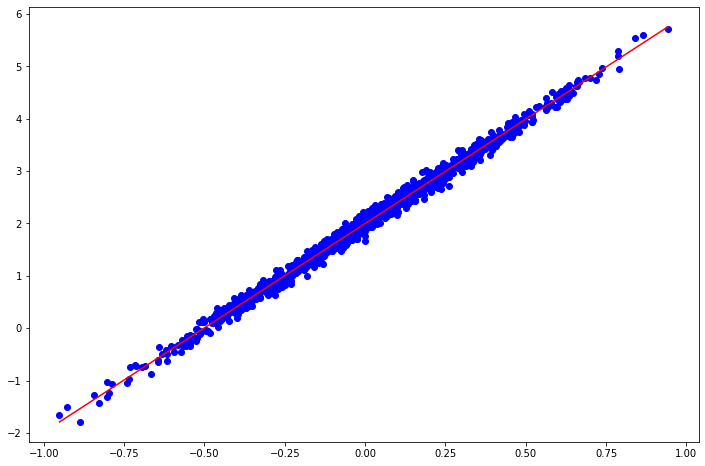

In [255]:
# нормальное уравнение
n=1000
t=np.zeros(n)
for i in range(n):
  start_time = time.time()
  x1,y1=norm_urav(x,y)
  t[i]=time.time() - start_time
print(t.mean())

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.5123906135559082
гармоническая ошибка по theta:  0.0017348301339347246


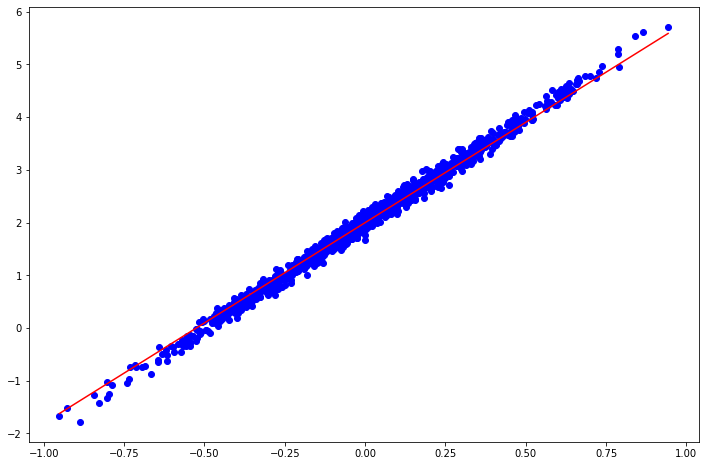

In [256]:
# стохастический градиентный  спуск

start_time = time.time()
theta = stochastic_grad(x, y,learning_rate = 0.2, max_iters=90)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.006310224533081055
гармоническая ошибка по theta:  0.00197592903963992


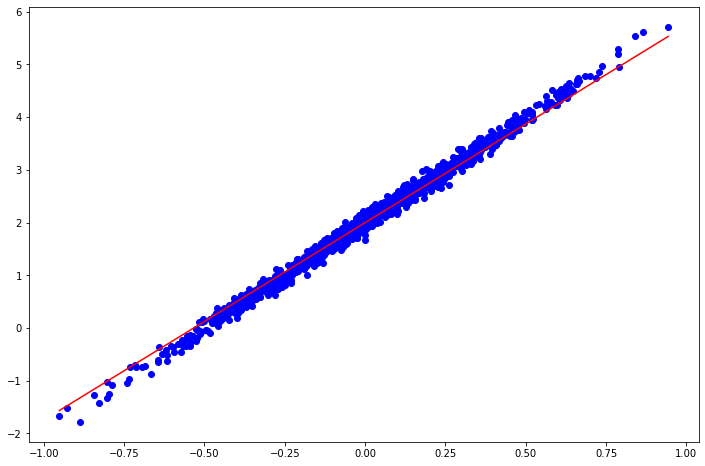

In [257]:
# пакетный градиентный спуск

start_time = time.time()
theta = batch_grad(x, y,learning_rate = 0.5, max_iters=30)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график

0.16001057624816895
гармоническая ошибка по theta:  0.0023053693477192946


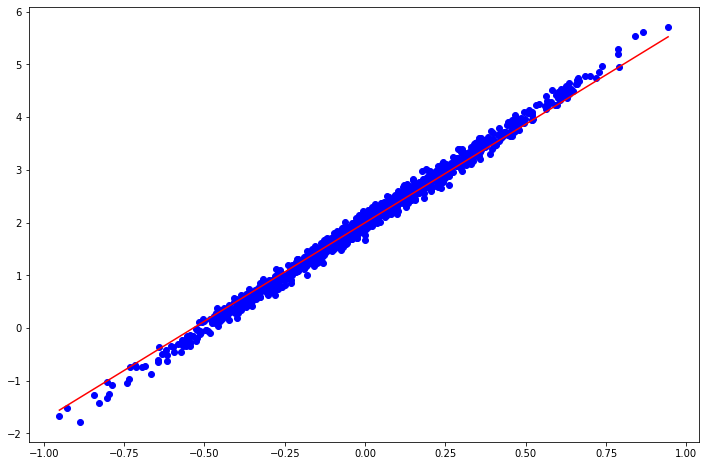

In [258]:
# минипакетный градиентный спуск

start_time = time.time()
theta = mini_batch_grad(x, y, learning_rate = 0.25,batch_size=20, max_iters=60)
x1=np.array([[x.min()], [x.max()]])
x1_b=np.c_[np.ones((2,1)),x1]
y1=x1_b.dot(theta)
x1=x1_b[:,1].reshape(2,1)
print(time.time() - start_time)
err1 = abs( theta[0][0]- param[0] )
err2 = abs( thetas[1][0] - param[1] )
err = 2 / ( (1/err1) + (1/err2) )
print("гармоническая ошибка по theta: ",err)


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию
plt.show() #Рисуем график
  

In [262]:
n=100
table_t=np.zeros(3)
table_err=np.zeros(3)
table_iters=np.zeros(3)

# стохастический градиентный  спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[0]=90
  theta = stochastic_grad(x, y,learning_rate = 0.2, max_iters=int(table_iters[0]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[0]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[0]=2 / ( (1/err1) + (1/err2) )

# пакетный градиентный спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[1]=30
  theta = batch_grad(x, y,learning_rate = 0.5, max_iters=int(table_iters[1]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[1]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[1]=2 / ( (1/err1) + (1/err2) )

# мини-пакетный градиентный спуск
t=np.zeros(n)
thetas=np.zeros((n,2))
for i in range(n):
  start_time = time.time()
  table_iters[2]=60
  theta = mini_batch_grad(x, y, learning_rate = 0.25,batch_size=20, max_iters=int(table_iters[2]))
  thetas[i]=theta.reshape(2,)
  t[i]=time.time() - start_time
table_t[2]=t.mean()
err1 = abs( thetas[:,0].mean() - param[0] )
err2 = abs( thetas[:,1].mean() - param[1] )
table_err[2]=2 / ( (1/err1) + (1/err2) )

table_1000=pd.DataFrame(np.array([table_t, table_err, table_iters]), columns=['стохастический','пакетный','мини-пакетный'], index=['время', 'ошибка', 'итерации'])
table_1000

стохастический   пакетный  мини-пакетный
время           0.511226   0.000267       0.155891
ошибка          0.001474   0.001759       0.001795
итерации       90.000000  30.000000      60.000000